# Compte rendu de TP <br/>
Régression linéaire

## Rappel des rèlges de notation

Le TP de chaque étudiant sera évalué via la plateforme “Classgrade”. Pour cela, vous devez déposer
un unique fichier anonymisé (votre nom doit apparaître uniquement dans le nom du fichier lui-même)
sous format ipynb sur le site http://peergrade.enst.fr/.<br/>
Vous devez **charger votre fichier, avant le jeudi 18/09/2018, 23h59**. Entre le vendredi 19/09/2018 et
**le vendredi 26/09/2018, 23h59, vous devrez noter 2 copies** qui vous seront assignées anonymement, en
tenant compte du barème suivant pour chaque question du TP :
 * 0 (manquant/ non compris/ non fait/ insuffisant)
 * 1 (passable/partiellement satisfaisant)
 * 2 (bien)
 
Ensuite, il faudra également évaluer de la même manière les points suivants (qui correspondent à 3
questions supplémentaires) :
 * aspect global de présentation : qualité de rédaction, orthographe, présentation, graphes, titres,
etc...
 * aspect global du code : indentation, Style PEP8, lisibilité du code, commentaires adaptés
 * Point particulier : absence de bug sur votre machine
 
Des commentaires pourront être ajoutés question par question si vous en sentez le besoin ou l’utilité pour
aider la personne notée à s’améliorer, et de manière obligatoire si vous ne mettez pas 2/2 à une question.
**Enfin, veillez à rester polis et courtois dans vos retours.**

## Exercice:

### Sujet

Nous travaillons sur la base de données diabetes de python. La base initiale comporte n = 442
patients et p = 10 covariables. La variable Y à expliquer est un score correspondant à l’évolution de la maladie. Pour s’amuser, un robot malicieux a contaminé le jeu de données en y ajoutant 200 variables explicatives inappropriées. Ensuite, non-content d’avoir déjà perverti notre jeu de données, il a volon- tairement mélangé les variables entre elle de façon aléatoire. Bien entendu le robot a ensuite pris soin d’effacer toute trace de son acte crapuleux si bien que nous ne connaissons pas les variables pertinentes. La nouvelle base de données comporte n = 442 patients et p = 210 covariables, notés X. Saurez-vous déjouer les plans de ce robot farceur et retrouver les variables pertinentes ?

In [1]:
#Cellule d'import 
########################################################




#        ATTENTION CETTE ETAPE EST LONGUE





########################################################

# Instalation des packages potentiellement manquant et initialisation 
# S'il vous manque des packages décommentez les lignes nécessaires
import sys
envs = !conda env list
active_env = list(filter(lambda s: '*' in str(s), envs))[0]
env_name = str(active_env).split()[0]
print( env_name)
#!conda install --yes -n  {env_name} seaborn
#!conda install --yes -n  {env_name} plotly
#!conda install --yes -n  {env_name} numpy
#!conda install --yes -n  {env_name} pandas
#!conda install --yes -n  {env_name} scikit-learn
#!conda install --yes -n  {env_name} scipy
import plotly
print("fin d'installation ")
plotly.tools.set_credentials_file(username='telecommsbgd2', api_key='vycTMoJ16qDZEdUWiOiC')

# pandas
import pandas as pd

# maths et statistique
import numpy as np
from numpy.linalg import matrix_rank,linalg
from scipy import stats
from sklearn.linear_model import LinearRegression,Ridge,LassoCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.feature_selection import f_regression
from sklearn.model_selection import KFold
import math

# graph
from plotly import tools
import plotly.figure_factory as ff
import plotly.plotly as py
import plotly.graph_objs as go
import matplotlib.pyplot as plt
import seaborn as sns


python36
fin d'installation 


### Question 1

Importer la base de données data_dm3.csv disponible depuis le lien https://bitbucket.org/portierf/shared_files/downloads/data_dm3.csv. La dernière colonne est la variable à expliquer.
Les autres colonnes sont les variables explicatives. Préciser le nombre de variables explicatives
et le nombre d’observations.


In [2]:
DF = pd.read_csv("https://bitbucket.org/portierf/shared_files/downloads/data_dm3.csv", header=None,sep=",")
# On renomme la derniere colonne pour plus de lisibilité
DF.rename(columns={210: 'Y'}, inplace=True)
print(DF.head())

          0         1         2         3         4         5         6  \
0 -1.298173 -0.162249  1.223379  1.355554  1.080171  0.634979  0.298741   
1  0.166951 -0.338060 -0.618867  0.759366  1.134281 -0.536844 -0.075120   
2 -0.416177 -0.205659 -1.282226  1.675500  1.523746  0.192029 -0.235840   
3  0.867184 -0.398667  0.093501  0.025971  1.852099  0.789774  0.801775   
4  1.193282 -0.936980 -0.725039  0.766078  0.223489 -1.584622  1.146866   

          7         8         9  ...         201       202       203  \
0  0.548270  0.731773  1.018645  ...    0.588278  0.210106  1.861458   
1  0.970251 -0.327487  0.717310  ...   -0.251054 -0.825716  0.339139   
2 -1.954626 -0.853309  0.892791  ...    1.283837  0.372516 -0.652557   
3  0.376711  0.853689  0.247953  ...    0.446582  0.334733  0.399074   
4  0.086136 -0.088780 -0.945066  ...    0.786157 -1.058179 -0.155788   

        204       205       206       207       208       209      Y  
0 -0.436399  0.279299 -1.416020 -2.332363  0.

In [3]:
print("Le nombre d'observations est :"+ str(DF.shape[0]))
print("Le nombre de variables explicatives est :"+str(DF.shape[1]-1))

Le nombre d'observations est :442
Le nombre de variables explicatives est :210


### Question 2

Les variables explicatives sont-elles centrées ? Normalisées ? Qu’en est-il de la variable à expliquer ?  
Tracer un scatter plot de la base de données avec 4 covariables prises au hasard et la variable à
expliquer (un scatterplot regroupe les graphes de chacune des variables en fonction de chacune des
autres). Commenter les graphiques obtenus.

In [4]:
# Changement d'echelle
val=DF.describe(include='all')

maxmean=round(np.max(val.drop("Y",axis=1).loc["mean"]),6)
minmean=round(np.min(val.drop("Y",axis=1).loc["mean"]),6)
maxstd=round(np.max(val.drop("Y",axis=1).loc["std"]),6)
minstd=round(np.min(val.drop("Y",axis=1).loc["std"]),6)


print("Le max de la moyenne est "+str(maxmean)+" et le min est "+str(minmean))
print("Le max de l'ecartype est "+str(maxstd)+" et le min est "+str(minstd))
print()
print(val.Y)

Le max de la moyenne est 0.0 et le min est -0.0
Le max de l'ecartype est 1.001133 et le min est 1.001133

count    442.000000
mean     152.133484
std       77.093005
min       25.000000
25%       87.000000
50%      140.500000
75%      211.500000
max      346.000000
Name: Y, dtype: float64


Au vu de l'ecart entre la valeur min et max pour la moyenne et l'ecart type on peut dire que **les covariables sont normalisées**.  
On peut cependant constater que **la variable à expliquer n'est pas normalisée**.

/anaconda3/envs/python36/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



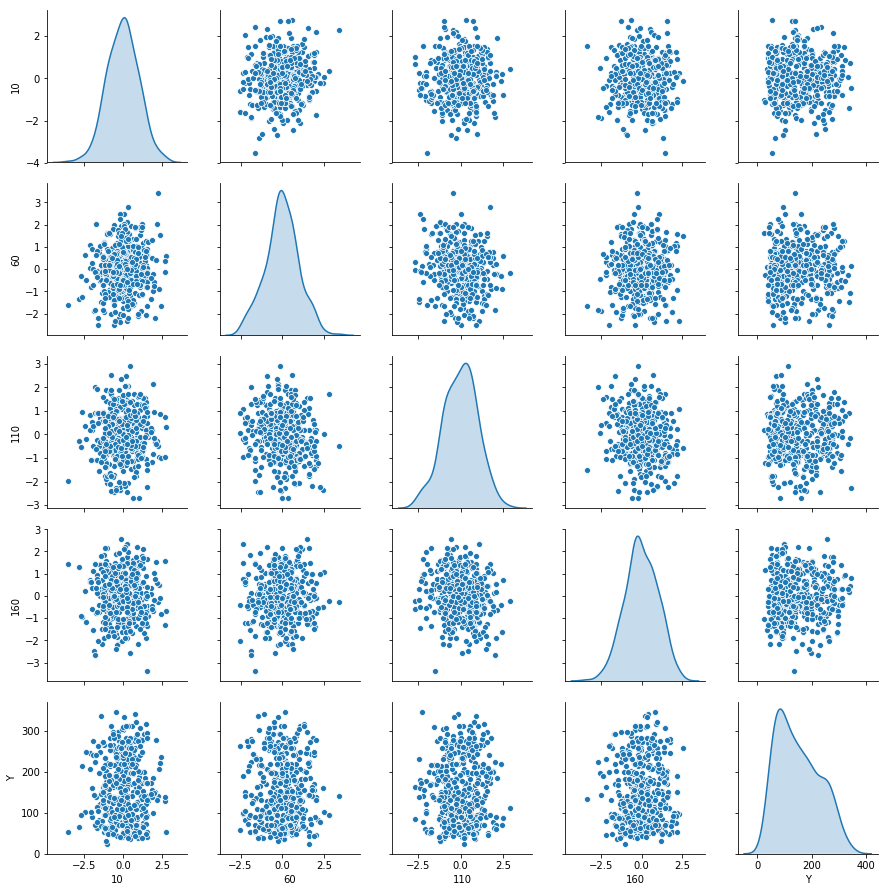

In [5]:
sns.pairplot(DF[[10,60,110,160,'Y']],diag_kind="kde")
plt.show()

Au vu des graphes n'on observe pas de réelle connexion entre les covariables et la variable à expliquer

### Question 3

Echantillon d’apprentissage et de test. Créer 2 échantillons : un pour apprendre le modèle, un pour tester le modèle. On mettra 20% de la base dans l’échantillon ’test’. Donner les tailles de chacun des 2 échantillons.

In [6]:
X_train, X_test, y_train, y_test = train_test_split( DF.drop(columns='Y'), DF.Y, test_size=0.2, random_state=2)
# Pour la reproductibilité des calculs on set le random state à 42 (réponse universelle)
print("Les X pour apprendre le modele possede "+str(X_train.shape[0])+" observations et "+str(X_train.shape[1]))
print("Les y pour apprendre le modele possede "+str(y_train.shape[0])+" observations et "+str(X_train.shape[1]))
print("Les X pour tester le modele possede "+str(X_test.shape[0])+" observations et "+str(X_train.shape[1]))
print("Les y pour tester le modele possede "+str(y_test.shape[0])+" observations et "+str(X_train.shape[1]))

Les X pour apprendre le modele possede 353 observations et 210
Les y pour apprendre le modele possede 353 observations et 210
Les X pour tester le modele possede 89 observations et 210
Les y pour tester le modele possede 89 observations et 210


### Question 4

Donner la matrix des correlations. Tracer le graphes de la décroissance des valeurs propres de la matrice de corrélation. Expliquer pourquoi il est légitime de ne garder que les premières variables de l’ACP. On gardera 60 variables dans la suite.

In [7]:
X_train.cov()

,0,1,2,3,4,5,6,7,8,9,...,200,201,202,203,204,205,206,207,208,209
0,0.951659,-0.114670,-0.036096,-0.307562,0.099498,0.142429,-0.090804,-0.204666,-0.031450,-0.042105,...,-0.110136,-0.025597,0.027049,0.035418,-0.067395,0.026417,-0.105302,0.032544,0.150840,0.016502
1,-0.114670,1.037060,0.096461,-0.193934,-0.101510,-0.124568,0.167980,-0.143550,0.072721,-0.100676,...,-0.110911,-0.042546,-0.065283,-0.220525,-0.020806,0.055082,0.027408,-0.125865,-0.063878,0.010379
2,-0.036096,0.096461,1.043458,-0.209761,0.127342,-0.089800,-0.090315,0.023447,-0.036294,-0.169766,...,0.171892,0.016333,0.140376,0.051888,0.030185,0.084359,-0.067451,-0.350041,0.009491,-0.143508
3,-0.307562,-0.193934,-0.209761,0.927242,-0.031828,-0.069256,0.185798,-0.038682,0.078158,0.025912,...,0.042600,-0.000060,-0.140617,0.131595,-0.027798,-0.205265,0.040143,-0.049746,-0.163300,-0.364187
4,0.099498,-0.101510,0.127342,-0.031828,0.939403,-0.035698,0.019815,0.215876,0.002817,0.090524,...,0.134749,0.012422,0.118374,-0.000736,-0.105617,-0.144025,0.007759,-0.028114,0.007494,-0.018686
5,0.142429,-0.124568,-0.089800,-0.069256,-0.035698,1.070670,0.159976,-0.062758,-0.119800,0.003832,...,-0.008665,-0.144131,0.036428,0.262309,-0.003056,-0.006773,0.057257,0.309613,0.043698,0.177658
6,-0.090804,0.167980,-0.090315,0.185798,0.019815,0.159976,1.053356,0.103138,0.139557,0.155737,...,-0.014737,-0.124944,-0.024052,0.079275,0.075236,-0.034940,0.052147,0.128007,0.047899,-0.014300
7,-0.204666,-0.143550,0.023447,-0.038682,0.215876,-0.062758,0.103138,1.015436,-0.020712,0.061896,...,-0.201965,-0.043041,-0.047826,0.118678,0.089920,0.015961,-0.022799,-0.272673,-0.045384,0.010140
8,-0.031450,0.072721,-0.036294,0.078158,0.002817,-0.119800,0.139557,-0.020712,0.994586,-0.093866,...,0.293790,-0.065406,-0.008339,-0.095170,0.036403,0.078237,-0.126113,-0.200542,0.023367,-0.174169
9,-0.042105,-0.100676,-0.169766,0.025912,0.090524,0.003832,0.155737,0.061896,-0.093866,0.990098,...,0.188103,-0.037760,0.061435,-0.050982,0.159021,0.091085,0.130028,0.103162,0.127460,0.084865


In [8]:
data = [
    go.Heatmap(
        z = X_train.cov().values,
        colorscale=[[0.0,'rgb(237,244,242)'],[0.15,'rgb(237,244,242)'],[0.25,'rgb(202,214,213)'],
                    [0.4,'rgb(58,91,121)'],[0.5,'rgb(35,54,86)'],[0.6,'rgb(58,91,121)'],
                    [0.75,'rgb(202,214,213)'],[0.85,'rgb(237,244,242)'],[1.0,'rgb(237,244,242)']]
        
    )
]

layout = go.Layout(
    title='Visualisation de la matrice de covariance',
    xaxis = dict(ticks='', nticks=36),
    yaxis = dict(ticks='', nticks=36)
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='Question4')

In [9]:
from numpy import linalg as LA
val_propre = LA.eig(X_train.cov())

In [10]:
val_propre_y = np.sort(val_propre[0].real)[::-1]

In [11]:
trace0 = go.Scatter(
    y = val_propre_y,
    mode = 'lines'
)
data = [trace0]
layout = go.Layout(
    title='Evolution des valeurs propres',
    xaxis = dict(title='Nieme valeur propre'),
    yaxis = dict()
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='Question42')

Il est en effet légitime de garder seulement 60 variables explicatives au vu du graphique ci dessus. En effet, on qu'à partir de la $60^{eme}$ variable, les valeurs propres sont nulles

In [12]:
(val_propre[0].real>=10e-6)

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [13]:
# On projete X_train dans son nouveau référentiel et on selectionne les features qui ont des valeurs propres non nulle (60 premiere)
X_projete=X_train@val_propre[1].real
PCA=X_projete.loc[:,(val_propre[0].real>=10e-6)]
PCA.head()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
70,0.391616,0.222932,0.985708,0.604706,-0.842317,1.222161,-0.495490,-0.041121,0.974188,3.391417,...,-1.096053,0.247779,0.357255,1.733959,-0.254334,-0.365819,-4.447310,-2.236727,0.198244,-0.008903
37,-2.595766,-0.380820,-0.732451,-0.003852,-0.915645,-2.103978,1.241642,0.507769,0.862956,1.492504,...,1.016350,-1.177073,-0.654635,3.453072,-1.142409,1.641391,0.189982,0.753371,-0.106328,0.037456
170,-2.487675,0.614138,1.396847,0.655038,0.734149,3.050716,-1.044545,-2.023924,-0.348042,-1.287058,...,-0.072327,-3.633069,0.492985,-3.955125,-2.176774,-0.187091,1.619439,0.902635,0.341106,-0.161723
400,0.546687,-0.191651,-0.752919,1.009685,-0.028873,-2.224844,0.499701,0.290595,1.400349,3.103071,...,1.791234,1.860780,-0.649179,3.851190,1.871465,-4.121578,-1.058386,2.347968,0.322292,0.072005
286,-3.869982,1.178053,-0.408678,0.546289,-1.648668,-2.040555,-1.065131,0.576352,-2.265898,1.171485,...,0.427948,0.794520,-2.252079,-1.622084,-0.584328,-0.248646,-1.403457,0.644526,0.726791,0.126265


### Question 5

Suivant les observations de la question (Q4), appliquer la méthode de "PCA before OLS" qui consiste à faire une ACP avant la régression. On tracera les valeurs des coefficients de régression calculés (sans l’intercept). Sur un autre graphique, faire de même avec la méthode des moindres carrées classique.

In [14]:
# Calcul des deux methodes de régression
PCAOLS = LinearRegression().fit(PCA,y_train)
OLS = LinearRegression().fit(X_train,y_train)

# Mise en place du graphique 
trace0 = go.Scatter(
    y = PCAOLS.coef_,
    mode = 'lines',
    showlegend=False
)
trace1 = go.Scatter(
    y = OLS.coef_,
    mode = 'lines',
    showlegend=False
)

fig = tools.make_subplots(rows=1, cols=2, subplot_titles=('PCA before OLS', 'OLS'))
fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 1, 2)

fig['layout'].update( title='"PCA before OLS"   versus   "OLS"')
py.iplot(fig, filename='Question5')

This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]



On peut observer que les coefficients de la "PCA before OLS" sont plus stable que les coefficients de L'OLS classique.

### Question 6

Donner les valeurs des intercepts pour les 2 régressions précédentes. Donner la valeur moyenne de la variable Y (sur le train set). Les intercepts des 2 questions sont-ils égaux ? Commenter. Centrer et réduire les variables après ACP (de petite dimension). Faire une régression avec ces variables et vérifier que l’intercept est bien égal à la moyenne de Y sur le train.

In [15]:
print("L'intercept pour l'OLS est "+str(OLS.intercept_))
print("L'intercept pour la PCA before OLS est "+str(PCAOLS.intercept_))
print("La valeur moyenne de Y est "+str(np.mean(y_train)))

L'intercept pour l'OLS est 150.89642351274787
L'intercept pour la PCA before OLS est 151.10230163738797
La valeur moyenne de Y est 150.45892351274787


On remarque une variation au niveau de l'intercept (surement du à la dé-normalisation lors split)

In [16]:
# On stoque la variance et la moyenne pour recentrer et reduire les variables apres l'ACP
PCA_STD=PCA.std()
PCA_MEAN=PCA.mean()

In [17]:
PCA_normalized = PCA
for col in PCA.columns:
    PCA_normalized[col]=PCA_normalized[col].apply(lambda x:(x-PCA_MEAN[col])/PCA_STD[col])
    
# On re calcule le modele avec les features renormalisées
PCANOLS = LinearRegression().fit(PCA_normalized,y_train)
print("L'intercept pour la PCA before OLS re-normalisé est "+str(PCANOLS.intercept_))
print("La valeur moyenne de Y est "+str(np.mean(y_train)))

L'intercept pour la PCA before OLS re-normalisé est 150.45892351274787
La valeur moyenne de Y est 150.45892351274787


Notre intercepte est bien  égale à la moyenne de notre set d'entrainement

### Question 7

Pour les 2 méthodes (OLS et PCA before OLS) : Tracer les résidus de la prédiction sur l’échantillon test. Tracer leur densité (on pourra par exemple utiliser un histogramme). Calculer le coefficient de détermination sur l’échantillon test. Calculer le risque de prédiction sur l’échantillon test.

In [18]:
"""
Pour prédire avec la méthode PCA before OLS normalisée, on doit appliquer l'ensemble des transformations
qu'on a effectué sur le jeu d'apprentissage, sur le jeu de test.
"""
X_test_projete=X_test@val_propre[1].real
X_test_PCA=X_test_projete.loc[:,(val_propre[0].real>=10e-6)]
X_test_PCA_normalized = pd.DataFrame()
for col in PCA.columns:
    X_test_PCA_normalized[col]=X_test_PCA[col].apply(lambda x:(x-PCA_MEAN[col])/PCA_STD[col])

Y_PCA_PRED = PCANOLS.predict(X_test_PCA_normalized)
Y_OLS_PRED = OLS.predict(X_test)

print("Calcul des coefficients de détermination")
print("Le coefficient de détermination du modèle 'PCA before OLS' normalisé est ",PCANOLS.score(X_test_PCA_normalized,y_test))
print("Le coefficient de détermination du modèle 'OLS classique' est",OLS.score(X_test,y_test))

Calcul des coefficients de détermination
Le coefficient de détermination du modèle 'PCA before OLS' normalisé est  0.2925870596657718
Le coefficient de détermination du modèle 'OLS classique' est 0.1756137879127766


In [19]:
# On calcule les Y prédits des 2 modeles
Y_PCA_PRED = PCANOLS.predict(X_test_PCA_normalized)
Y_OLS_PRED = OLS.predict(X_test)


def get_Rpred(Y,Ypred,X):
    """
    Fonction retournant à partir des Y, des Y prédits et du X à partir du quel on calcule les Y prédits 
    le risque de prédiction
    """
    sigma_2=(1/(X.shape[0] - matrix_rank(X))) * np.sum((Y - Ypred)**2)
    return (matrix_rank(X)/X.shape[0])*(sigma_2)

print("Calcul du risque de prédiction")
print("Le risque de prédiction de l'\"OLS classique\" est ",get_Rpred(y_test,Y_OLS_PRED,X_test))
print("Le risque de prédiction de la \"PCA before OLS\" normalisée est",get_Rpred(y_test,Y_PCA_PRED,X_test))

Calcul du risque de prédiction
Le risque de prédiction de l'"OLS classique" est  9423.865208137506
Le risque de prédiction de la "PCA before OLS" normalisée est 8086.700260698484


A partir du risque de prédiction et du coefficient de détermination, on peut déjà observer que le modèle PCA before OLS est meilleur

In [20]:

Residual_OLS=y_test-Y_OLS_PRED
Residual_PCA=y_test-Y_PCA_PRED
# Group data together
hist_data = [Residual_OLS,Residual_PCA]

group_labels = ["Residue de l'OLS", "Residue de la 'PCA before OLS'"]

# Create distplot with custom bin_size
fig = ff.create_distplot(hist_data, group_labels, bin_size=[20, 20])

# Plot!
fig['layout'].update( title='Densité des résidus "PCA before OLS" et "OLS"')
py.iplot(fig, filename='Distplot with Multiple Bin Sizes')

### Question 8
Appliquer la méthode de forward variable sélection. On pourra utiliser la statistique du test de nullité du coefficient (comme vu en cours). Pour l’instant, on ne met pas de critère d’arret sur la méthode. C’est à dire que l’on ajoute une variable à chaque étape jusqu’à retrouver la totalité des variables. Afficher l’ordre de séléction des variables.

In [21]:
def forward_selection(X,Y,critere):
    # Initialisation
    col_utilise=[]
    n=X.shape[0]
    Select_feature=pd.DataFrame()
    stepEvolution=pd.DataFrame()
    
    for step in range(X.shape[1]):
        pval_tmp=pd.DataFrame()
        for col in X.columns:
            if col not in col_utilise:
                # Création du modèle
                index=[col]
                OLS = LinearRegression().fit(X[index],Y) 
                #On notera que dans mon cas je choisi de garder l'intercept pour avoir une plus large selection
                #OLS = LinearRegression(fit_intercept=False).fit(X[index],Y)
                Y_PRED = OLS.predict(X[index])

                # Calcul de la tstat
                residue_tmp = Y-Y_PRED
                P1=matrix_rank(X[index])+1
                std_residu = np.sum(residue_tmp ** 2) / (n - P1)
                std_coef=np.sqrt(std_residu/np.sum((X[col] - np.mean(X[col])) ** 2))
                tstat= np.abs(OLS.coef_[len(OLS.coef_)-1])/std_coef

                # Calcul de la pvalue
                deg=n-P1
                pvalues = (1 - stats.t.cdf(tstat, deg)) * 2

                # Workflow inter boucle
                # - Collecte tstat au cours des steps
                tmp1={}
                tmp1['feature']=col
                tmp1['tstat']=tstat
                tmp1['step']=step
                stepEvolution=stepEvolution.append([tmp1],ignore_index=True)
                # - Stockage des tstat, pval et residue associés aux features pour fwd-selection
                tmp={}
                tmp['feature']=col
                tmp['tstat']=tstat
                tmp['residue']=residue_tmp
                tmp['pval']=pvalues
                pval_tmp = pval_tmp.append([tmp],ignore_index=True)
            else:
                # Workflow inter boucle
                # - Collecte tstat au cours des steps
                tmp1={}
                tmp1['feature']=col
                tmp1['tstat']=0
                tmp1['step']=step
                stepEvolution=stepEvolution.append([tmp1],ignore_index=True)
                
            
        
        selected=pval_tmp.sort_values('tstat',ascending=False).values[0]
        Y=selected[2]
        # Gestion de la condition d'arret
        if selected[1]>=critere:
            break
        # Ajout de la nouvelle feature selectionnée
        Select_feature=Select_feature.append([{'feature':selected[0],'ind':step,'p-value':selected[1],'tstat':selected[3]}],ignore_index=True)
        col_utilise.append(selected[0])
        

    
    return Select_feature,stepEvolution




In [22]:
AllFeatureSorted,_=forward_selection(X_train,y_train,1)
AllFeatureSorted.feature.values

array([ 58, 123, 129, 111, 167, 133, 159, 208,  35,  68, 206,  14,  38,
        19,  22, 173, 135, 112, 155, 118, 115,  49, 160,  34, 100,  80,
        27, 209,  43, 138, 192,  41,  89, 165, 166,  46,  11,  70,  99,
        33, 162,  93, 169, 171, 149,  77,  24,  79, 104,  97, 121,  23,
       130,  67,  78, 156, 122, 125, 183, 174, 147,  61,  45,  73, 101,
         5, 170, 102,  25, 176,  47, 107, 150, 142,  91, 163,   8,  90,
        83, 140,  16, 196, 204, 124, 116,  81, 144,  84, 110,  74, 190,
        60, 197, 184, 146,   6,  12, 164,  57, 203, 131, 175,  17,  63,
        15,  69, 105,  40,  95,  20,   9,  10, 185, 199,  31, 148, 205,
       106, 158, 141, 137,  26,  36, 127, 187,  28, 200, 120, 109,  30,
        94, 179,  75,   2, 108,  56,  98,  92, 182,  18,   7,  66,  85,
       128,  76,  39,   0, 194, 188,   1, 168, 172,  65,  88,  54, 103,
        59, 195, 198, 180,  53,  52,  71, 132, 153, 189,  29, 117, 152,
        86, 178, 113, 114,  82,  50,  42, 157, 119, 207, 139,  5

### Question 9

Critère d’arrêt : On décide d’arrêter lorsque la p-valeur dépasse 0.1. Illustrer la méthode en donnant  
(i) les 3 graphes des statistiques obtenues lors de la sélection de la 1er, 2eme et 3eme variables (en abscisse : l’index des variables, en ordonné : la valeur des stats) ,  
(ii) le graphe des 50 premières p-valeurs (dont chacune est associée à la variable sélectionnée). Sur ce même graphe, on tracera la ligne horizontale d’ordonnée 0.1. Enfin on donnera la liste des variables sélectionnées.


In [23]:
# Par faute d'inspiration le forward selection s'appelle Question9I
critere=0.1
Question9I,step=forward_selection(X_train,y_train,critere)
Question9I.head()

,feature,ind,p-value,tstat
0,58,0,0.000000e+00,13.854857
1,123,1,1.887379e-14,7.995535
2,129,2,3.787182e-03,2.914835
3,111,3,1.222923e-02,2.518510
4,167,4,2.429105e-02,2.262279


In [24]:
print('La liste des variables selectionnées au critere '+str(critere)+' est:')
for i in Question9I.feature:
    print(' - colonne '+str(i)  )
# On enregistre la selection proposé par la methode forward
Selection_fwd=Question9I.feature

La liste des variables selectionnées au critere 0.1 est:
 - colonne 58
 - colonne 123
 - colonne 129
 - colonne 111
 - colonne 167
 - colonne 133
 - colonne 159
 - colonne 208
 - colonne 35
 - colonne 68
 - colonne 206


In [25]:
# nombre de var a afficher puis gestion de query
nvar=3
txt=str(Question9I.feature.astype(str).head(nvar).values).replace(" ",",")
print(txt)
tb=step.pivot(index='feature',columns='step',values='tstat').query('feature in '+txt)

# Mise en place de l'affichage
data=[]
for stepX in range(nvar+1):
    trace1 = go.Scatter(
    x = tb.index,
    y = tb[stepX],
    mode = 'markers',
    marker=dict(size=15),
    name="Step "+str(stepX),
    showlegend=True
    )
    data.append(trace1)
layout = go.Layout(
    title='Evolution des tstats des différentes index à chaque step',
    xaxis=dict(title='Index of feature'),
    yaxis=dict(title='tstats')    
)

fig = go.Figure(data, layout)
py.iplot( fig ,filename='Question9I')


['58','123','129']


In [26]:

trace1 = go.Scatter(
    x = [AllFeatureSorted.feature.min(),49],
    y = [0.1,0.1],
    mode = 'lines',
    name='Seuil',
    showlegend=False
    )
trace2 = go.Scatter(
    y = AllFeatureSorted.head(50)['p-value'].values,
    mode = 'markers',
    marker=dict(size=5),
    name='P_values',
    showlegend=False
    )
data=[trace2,trace1]
layout = go.Layout(
    title='Evolution de la P value au cours des itérations de selection de colonnes',
    
)

fig = go.Figure(data, layout)
py.iplot( fig ,filename='Question9II')


### Question 10
Appliquer OLS sur les variables sélectionnées. Donner le risque de prédiction obtenu l’échantillon
test et le comparer à ceux de OLS et PCA before OLS.

In [27]:
OLS_Forward = LinearRegression().fit(X_train[Selection_fwd],y_train)
Y_FORWARD_PRED=OLS_Forward.predict( X_test[Selection_fwd])
print("Calcul du risque de prédiction")
print("Le risque de prédiction de l'\"OLS classique\" est ",get_Rpred(y_test,Y_OLS_PRED,X_test))
print("Le risque de prédiction de la \"PCA before OLS\" normalisée est",get_Rpred(y_test,Y_PCA_PRED,X_test))
print("Le risque de prédiction du \"Forward selection before OLS\" est",get_Rpred(y_test,Y_FORWARD_PRED,X_test[Selection_fwd]))
print()
print("Calcul des coefficients de détermination")
print("Le coefficient de détermination du modèle 'OLS classique' est",OLS.score(X_test,y_test))
print("Le coefficient de détermination du modèle 'PCA before OLS' normalisé est ",PCANOLS.score(X_test_PCA_normalized,y_test))
print("Le coefficient de détermination du modèle 'Forward selection before OLS' est ",OLS_Forward.score( X_test[Selection_fwd],y_test))

Calcul du risque de prédiction
Le risque de prédiction de l'"OLS classique" est  9423.865208137506
Le risque de prédiction de la "PCA before OLS" normalisée est 8086.700260698484
Le risque de prédiction du "Forward selection before OLS" est 557.6224536056069

Calcul des coefficients de détermination
Le coefficient de détermination du modèle 'OLS classique' est 0.1756137879127766
Le coefficient de détermination du modèle 'PCA before OLS' normalisé est  0.2925870596657718
Le coefficient de détermination du modèle 'Forward selection before OLS' est  0.2843559300097034


De ces résultats on peut noter deux choses:
  - Le rpred du Forward selection est sensiblement meilleur que les deux autres modèles de selection, on se rapproche de Y original.
  - Avec 10 features pour le forward selection on obtient presque le meme coefficient de détermination que la "PCA before OLS" (qui en utilise 60).

### Question 11
Afin de préparer la validation croisée, séparer l’échantillon train en 4 parties (appelées ”folds”) de
façon aléatoire. On affichera les numéros d’échantillon sélectionnés dans chaque fold.

In [28]:
kf=KFold(n_splits=4, random_state=2, shuffle=True)
i=1
for train_index, test_index in kf.split(X_train.reset_index(drop=True)):
    print("kfold combinaison n° ",i)
    print("TRAIN:", train_index)
    print("TEST:", test_index)
    print()
    i+=1

kfold combinaison n°  1
TRAIN: [  0   1   2   4   5   6   8   9  11  14  15  16  18  19  21  22  23  26
  27  28  31  32  33  34  36  37  38  39  40  42  43  44  45  46  47  48
  49  50  51  52  53  54  56  57  58  59  61  62  63  64  71  72  73  74
  75  76  78  79  80  81  82  83  85  86  87  88  90  91  92  93  95  96
  97 101 102 103 104 105 106 107 108 109 110 111 113 115 116 117 118 119
 120 121 122 123 124 125 127 129 130 132 133 134 135 136 137 138 139 140
 141 143 144 145 148 149 154 155 158 159 162 164 165 166 167 168 170 171
 173 175 176 177 178 179 181 182 183 184 185 186 187 190 191 193 194 195
 196 197 198 200 201 202 203 204 205 207 208 209 211 212 213 214 218 219
 220 221 222 224 226 228 229 231 233 235 237 238 239 242 243 245 246 247
 248 249 250 252 253 254 255 256 258 259 260 261 263 265 266 267 270 271
 272 273 274 275 277 278 279 280 281 282 283 284 286 287 288 289 290 292
 293 294 295 296 297 299 300 301 302 303 304 307 309 310 311 312 313 314
 315 316 317 318 319

### Question 12
Appliquer la méthode de la régression ridge. Pour le choix du paramètre de régularisation, on fera
une validation croisée sur les ”folds” définies lors de la question précédente. A tour de rôle chacune
des ”folds” servira pour calculer le risque de prédiction alors que les autres seront utilisées pour
estimer le modèle. On moyennera ensuite les 4 risques de prédictions. On donnera la courbe du
risque de validation croisée en fonction du paramètre de régularisation (on veillera à bien choisir
l’espace de définition pour le graphe). Donner le paramètre de régularisation optimal et la valeur
du risque sur le test.

In [29]:
# Liste de alpha a testé
alpha_grid = [10e-3,10e-2,10e-1,10e2]+list(range(1,200,1))

# Initialisation de variables annexes
X_train_cv=X_train.reset_index(drop=True)
y_train_cv=y_train.reset_index(drop=True)
Scoring_alpha=pd.DataFrame()

# calcul sur l'ensmeble d'alpha
for alpha in alpha_grid:
    tmp={}
    rpred=[]
    # cross validation
    combinaison=0
    for train_index, test_index in kf.split(X_train):
        ridge = Ridge(alpha).fit(X_train_cv.loc[train_index,:],y_train_cv.loc[train_index])
        r = get_Rpred(y_train_cv.loc[test_index],ridge.predict(X_train_cv.loc[test_index,:]),X_train_cv.loc[test_index,:])
        rpred.append(r)
        tmp['Rpred'+str(combinaison)]=r
        combinaison+=1
    tmp['alpha']=alpha
    tmp['Rpred_mean']=np.mean(rpred)
    Scoring_alpha = Scoring_alpha.append([tmp])

print("Liste des meilleurs alpha avec leur risque de prédiction associé")
print(Scoring_alpha.sort_values('Rpred_mean')[['Rpred_mean','alpha']].head())
print()

best_alpha=Scoring_alpha.sort_values('Rpred_mean').alpha.values[0]
Y_RIDGE_PRED = Ridge(best_alpha).fit(X_train,y_train).predict(X_test)
print("Le meilleur alpha est ",best_alpha)
print("Le risque de prédiction du \"Ridge\" avec alpha =",best_alpha,"est",get_Rpred(y_test,Y_RIDGE_PRED,X_test))

Liste des meilleurs alpha avec leur risque de prédiction associé
    Rpred_mean  alpha
0  7612.139306   51.0
0  7612.139748   50.0
0  7612.190968   52.0
0  7612.193855   49.0
0  7612.293231   53.0

Le meilleur alpha est  51.0
Le risque de prédiction du "Ridge" avec alpha = 51.0 est 8146.618228549626


In [30]:
data=[]
trace1 = go.Scatter(
    x = Scoring_alpha.sort_values('alpha').alpha,
    y = Scoring_alpha.sort_values('alpha')['Rpred_mean'],
    mode = 'lines',
    name='Risque de prédiction moyen'
    )
for com in range(4):
    trace = go.Scatter(
    x = Scoring_alpha.sort_values('alpha').alpha,
    y = Scoring_alpha.sort_values('alpha')['Rpred'+str(com)],
    name='Risque de prédiction '+str(com),
        line = dict(
        width = 1,
        dash = 'dash')
    )
    data.append(trace)

data.append(trace1)
layout = go.Layout(
    title='Influence d\'alpha sur le risque de prédiction' ,
    xaxis=dict(title='alpha',
        type='log'
    ),
    yaxis=dict(title='Risque de prediction')
    
)

fig = go.Figure(data, layout)
py.iplot( fig ,filename='scatter-mode')



### Question 13
A l’aide de la fonction lassoCV de sklearn, choisir le paramètre de régularisation du LASSO. Donner
le risque de prédiction associé.

In [31]:
lasso = LassoCV(cv=4, random_state=2).fit(X_train, y_train)
print("Le meilleur alpha déterminé par la méthode lasso est",lasso.alpha_)
print("Le risque de prédiction du \"Lasso\" avec alpha =",lasso.alpha_,"est",get_Rpred(y_test,lasso.predict(X_test),X_test))

Le meilleur alpha déterminé par la méthode lasso est 5.658966068838082
Le risque de prédiction du "Lasso" avec alpha = 5.658966068838082 est 7006.029121409712


### Question 14

Donner les variables selectionées par le lasso. Combien y-en a t-il ? Appliquer la méthode OLS aux
variables sélectionnées. Cette méthode est appelé Least-square LASSO.

In [32]:
# Affichage de la selection du lasso
Selection_lasso=X_train.columns[lasso.coef_!=0.0]
print("La méthode lasso a sélectionné les",np.count_nonzero(Selection_lasso.values),"features suivante:",Selection_lasso.values)
# Calcul et affichage du risque de prédiction
Y_OLSLASSO_PRED=LinearRegression().fit(X_train[Selection_lasso],y_train).predict(X_test[Selection_lasso])
print("Le risque de prédiction du \"Least-square LASSO\" est",get_Rpred(y_test,Y_OLSLASSO_PRED,X_test))

La méthode lasso a sélectionné les 13 features suivante: [8 49 58 84 111 112 123 129 159 167 168 174 208]
Le risque de prédiction du "Least-square LASSO" est 8154.787993466272


### Question 15

Cette dernière question est un question d’ouverture vers une approche non-linéaire. En utilisant les
variables séléctionées par le LASSO (Q13) ou par la méthode forward (Q9), mettre au point une
méthode de regression non-linéaire. On apprendra les différents paramètres par validation croisée
et l’on donnera la valeur du risque de prédiction calculé sur l’échantillon test. Des performances
moindres par rapport à OLS peuvent se produire. Commenter.

In [33]:
# Initialisation
Scoring_rf=pd.DataFrame()
md_grid=[1,2,3,5,7,10]
nt_grid=[1,50,100,150,200,300,500]
X_train_cv=X_train[Selection_lasso].reset_index(drop=True)
y_train_cv=y_train.reset_index(drop=True)

# Parcours les parametres 'max_depts' et 'num_trees'
for nt in nt_grid:
    for md in md_grid:
        tmp={}
        rpred=[]
        combinaison=0
        
        for train_index, test_index in kf.split(X_train):
            rf = RandomForestRegressor(max_depth=md, random_state=2,n_estimators=nt).fit(X_train_cv.loc[train_index,:],y_train_cv.loc[train_index])
            r = get_Rpred(y_train_cv.loc[test_index],rf.predict(X_train_cv.loc[test_index,:]),X_train_cv.loc[test_index,:])
            rpred.append(r)
            tmp['Rpred'+str(combinaison)]=r
            combinaison+=1
        tmp['max_depth']=md
        tmp['n_tree']=nt
        tmp['Rpred_mean']=np.mean(rpred)
        Scoring_rf = Scoring_rf.append([tmp])
print("Liste des meilleures combinaisons avec leur risque de prédiction associé")
print(Scoring_rf.sort_values('Rpred_mean')[['Rpred_mean','max_depth','n_tree']].head())
print()
best_nt=Scoring_rf.sort_values('Rpred_mean').n_tree.values[0]
best_md=Scoring_rf.sort_values('Rpred_mean').max_depth.values[0]
Y_RF_PRED = RandomForestRegressor(max_depth=best_md, random_state=2,n_estimators=best_nt).fit(X_train[Selection_fwd],y_train).predict(X_test[Selection_fwd])
print("La meilleure combinaison de parametres est:")
print("   - max_depth",best_md)
print("   - num_tree",best_nt)
print("Le risque de prédiction du \"RandomForest\" est",get_Rpred(y_test,Y_RIDGE_PRED,X_test))

Liste des meilleures combinaisons avec leur risque de prédiction associé
   Rpred_mean  max_depth  n_tree
0  543.268884          5      50
0  549.522365          5     100
0  550.507355          5     150
0  551.591623          5     300
0  551.796633          5     200

La meilleure combinaison de parametres est:
   - max_depth 5
   - num_tree 50
Le risque de prédiction du "RandomForest" est 8146.618228549626


In [34]:
fig = tools.make_subplots(rows=1, cols=2, subplot_titles=('Impact de la profondeur max sur le risque de prédiction', 'Impact du nombre d\'arbres sur le risque de prédiction'))


# Figure max depth
trace1a = go.Scatter(
    x = Scoring_rf.query('n_tree == '+str(best_nt)).sort_values('max_depth').max_depth,
    y = Scoring_rf.query('n_tree == '+str(best_nt)).sort_values('max_depth')['Rpred_mean'],
    mode = 'lines',
    name='Risque de prédiction max_depth moyen'
    )
fig.append_trace(trace1a, 1, 1)
for com in range(4):
    tracea = go.Scatter(
    x = Scoring_rf.query('n_tree == '+str(best_nt)).sort_values('max_depth').max_depth,
    y = Scoring_rf.query('n_tree == '+str(best_nt)).sort_values('max_depth')['Rpred'+str(com)],
    name='Risque de prédiction max_depth '+str(com),
        line = dict(
        width = 1,
        dash = 'dash')
    )
    fig.append_trace(tracea, 1, 1)
    
# Figure ntrees    
trace1b = go.Scatter(
    x = Scoring_rf.query('max_depth == '+str(best_md)).sort_values('n_tree').n_tree,
    y = Scoring_rf.query('max_depth == '+str(best_md)).sort_values('n_tree')['Rpred_mean'],
    mode = 'lines',
    name='Risque de prédiction n_tree moyen'
    )
fig.append_trace(trace1b, 1, 2)
for com in range(4):
    traceb = go.Scatter(
    x = Scoring_rf.query('max_depth == '+str(best_md)).sort_values('n_tree').n_tree,
    y = Scoring_rf.query('max_depth == '+str(best_md)).sort_values('n_tree')['Rpred'+str(com)],
    name='Risque de prédiction n_tree '+str(com),
        line = dict(
        width = 1,
        dash = 'dash')
    )
    fig.append_trace(traceb, 1, 2)
fig['layout'].update( title='Analyse du risque prédit pour le random forest')
py.iplot(fig, filename='Question15')

This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]



In [35]:
print("Le risque de prédiction du \"Least-square LASSO\" est",get_Rpred(y_test,Y_OLSLASSO_PRED,X_test))
print("Le risque de prédiction du \"Lasso\" avec alpha =",lasso.alpha_,"est",get_Rpred(y_test,lasso.predict(X_test),X_test))
print("Le risque de prédiction du \"Ridge\" avec alpha =",best_alpha,"est",get_Rpred(y_test,Y_RIDGE_PRED,X_test))
print("Le risque de prédiction du \"RandomForest\" est",get_Rpred(y_test,Y_RIDGE_PRED,X_test))
print("Le risque de prédiction de l'\"OLS classique\" est ",get_Rpred(y_test,Y_OLS_PRED,X_test))
print("Le risque de prédiction de la \"PCA before OLS\" normalisée est",get_Rpred(y_test,Y_PCA_PRED,X_test))

Le risque de prédiction du "Least-square LASSO" est 8154.787993466272
Le risque de prédiction du "Lasso" avec alpha = 5.658966068838082 est 7006.029121409712
Le risque de prédiction du "Ridge" avec alpha = 51.0 est 8146.618228549626
Le risque de prédiction du "RandomForest" est 8146.618228549626
Le risque de prédiction de l'"OLS classique" est  9423.865208137506
Le risque de prédiction de la "PCA before OLS" normalisée est 8086.700260698484


In [36]:
print("La selection trouvée par la methode Lasso est",Selection_lasso.values)
print("La selection trouvée par la methode forward est",Selection_fwd.values)

La selection trouvée par la methode Lasso est [8 49 58 84 111 112 123 129 159 167 168 174 208]
La selection trouvée par la methode forward est [ 58 123 129 111 167 133 159 208  35  68 206]


Apres tous ces tests de modèle, le lasso obtient le meilleur risque de prédiction meme si les autres modèle ne sont pas forcement trop éloigné.  
Les selections proposées par les methodes forward et Lasso ne sont pas exactement identique mais on pourra noter des similitudes.  